# <p style="color:blue">Feedback from Instructor</p>

### Overall Comments


* You provided a clear executive summary and problem statement, and the problem your team chose to tackle is pretty interesting.
* Generally you provided a very clear and methodical approach to tackling this problem.
* Anyway I liked that the insights your team provide are measured, and you didn't make simply statements that correlation implied causation. Overall good effort!

### Score Breakdown

| Component         | Score |
| ----------------- | :---: |
| Executive Summary |  2/3  |
| Problem Statement |  2/3  |
| Methodology       |  12/14 |
| **Total**         |  16/20 |

<center><h1>Strategy to maximize box office income</h1></center>
<hr>
<justify><h2>Datasets: Boxofficemojo Alltime Domestic Data and The Movies Dataset</h2></justify>
<hr>
<justify><h3>Source of Datasets: Kaggle</h3></justify>
<hr>

(List down the team members & telegram handles so we can easily communicate with you on the project)
### Author(s)

- Lee Hong Wei (@cb169)

- Teo Kai Jie (@KJusestele)

Class: Sat 3.30-6.30pm

### Executive Summary

(Short paragraph on the topic, hypothesis & conclusions of your study. No more than 2 paragraphs.)

Most people guage a movie's success through its box office numbers. One of the most common method to achieve high box office figures is to create movie contents which viewers like. In this project, we will be examining the relationship of various factors that can affect a movie's success, such as the timing of movie release, the title of film, sentiments of viewers leading to the film's release or even performance of related movies in the case of movie sequels, and then comparing these factors with their box office returns. The box office market we will be analysing is the United States market, as this industry in the US is one of the largest in the world in today's economy. We will be using several datasets obtained from Kaggle for our analysis. A set of data analysis tools from the Pandas and the matplotliblibrary, nltk and so on will be used to visualise our given data which includes plots. This will be explained further below.

#### Essential Modules

In [1]:
# import the relevant packages
import ast
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Set matplotlib inline
%matplotlib inline
from datetime import datetime
# import nltk
# nltk.download("stopwords")
# nltk.download("words")
# from nltk.stem import PorterStemmer
# from nltk.corpus import stopwords, words
# from nltk.tokenize import word_tokenize
# from nltk.stem import WordNetLemmatizer
# s = PorterStemmer()
# lemmatizer = WordNetLemmatizer()
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
regr = linear_model.LinearRegression()
import re
from collections import Counter
from wordcloud import WordCloud

#### Essential Functions

In [2]:
def convert_timestamp(x):
    return datetime.fromtimestamp(x)

def lemmatize(pair):
    word, tag = pair
    try:
        return lemmatizer.lemmatize(word, pos=tag[0].lower())
    except KeyError:
        return word
    
def cast_getter(cast_list):
    cast_list = ast.literal_eval(cast_list)
    gernerated_list = [d.get('name') for d in cast_list]
    gernerated_list = list(gernerated_list)
    return gernerated_list

def remove_space(word):
    word = re.sub(" ", "", word)
    return word

#### Importing the Dataset

In [3]:
credits_df = pd.read_csv('credits.csv')
credits_df.head()

,cast,crew,id
0,"[{'cast_id': 14, 'character': 'Woody (voice)',...","[{'credit_id': '52fe4284c3a36847f8024f49', 'de...",862
1,"[{'cast_id': 1, 'character': 'Alan Parrish', '...","[{'credit_id': '52fe44bfc3a36847f80a7cd1', 'de...",8844
2,"[{'cast_id': 2, 'character': 'Max Goldman', 'c...","[{'credit_id': '52fe466a9251416c75077a89', 'de...",15602
3,"[{'cast_id': 1, 'character': ""Savannah 'Vannah...","[{'credit_id': '52fe44779251416c91011acb', 'de...",31357
4,"[{'cast_id': 1, 'character': 'George Banks', '...","[{'credit_id': '52fe44959251416c75039ed7', 'de...",11862


In [4]:
metadata_df = pd.read_csv('movies_metadata.csv')
metadata_df.head(2)

C:\Users\tkjie\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3049: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


### Cleaning the Dataset

From the datafram 'metadata_df', we only want relevant data that can be used for analysis. Hence we filter off irrelevant data such as 'belongs_to_collection', 'genres', 'homepage', 'imdb_id', 'overview', 'spoken_languages', 'tagline', 'production_companies', 'production_countries', 'poster_path', 'status'. For movies with no revenue, we convert the value to a numerical value zero.

In [5]:
print("The original dataset columns:\n", list(metadata_df.columns.values))
improve_metadata_df = metadata_df.drop(columns = ['belongs_to_collection', 'genres', 'homepage', 'imdb_id',
                                                  'overview', 'spoken_languages', 'tagline', 'production_companies',
                                                  'production_countries', 'poster_path', 'status'], axis = 1)
improve_metadata_df = improve_metadata_df.dropna()
improve_metadata_df.head()

The original dataset columns:
 ['adult', 'belongs_to_collection', 'budget', 'genres', 'homepage', 'id', 'imdb_id', 'original_language', 'original_title', 'overview', 'popularity', 'poster_path', 'production_companies', 'production_countries', 'release_date', 'revenue', 'runtime', 'spoken_languages', 'status', 'tagline', 'title', 'video', 'vote_average', 'vote_count']


,adult,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,title,video,vote_average,vote_count
0,False,30000000,862,en,Toy Story,21.9469,1995-10-30,373554033.0,81.0,Toy Story,False,7.7,5415.0
1,False,65000000,8844,en,Jumanji,17.0155,1995-12-15,262797249.0,104.0,Jumanji,False,6.9,2413.0
2,False,0,15602,en,Grumpier Old Men,11.7129,1995-12-22,0.0,101.0,Grumpier Old Men,False,6.5,92.0
3,False,16000000,31357,en,Waiting to Exhale,3.85949,1995-12-22,81452156.0,127.0,Waiting to Exhale,False,6.1,34.0
4,False,0,11862,en,Father of the Bride Part II,8.38752,1995-02-10,76578911.0,106.0,Father of the Bride Part II,False,5.7,173.0


Initial Datatypes of the Dataframe Column

In [6]:
print(improve_metadata_df.dtypes)

adult                 object
budget                object
id                    object
original_language     object
original_title        object
popularity            object
release_date          object
revenue              float64
runtime              float64
title                 object
video                 object
vote_average         float64
vote_count           float64
dtype: object


Updated Datatypes for Columns

In [7]:
improve_metadata_df[['budget', 'id', 'popularity']] = improve_metadata_df[['budget', 'id', 'popularity']
                                                                         ].convert_objects(convert_numeric = True)
improve_metadata_df['release_date'] = pd.to_datetime(improve_metadata_df['release_date'], format='%Y/%m/%d')
improve_metadata_df['cast_list'] = credits_df['cast'].apply(cast_getter)
print(improve_metadata_df.dtypes)

C:\Users\tkjie\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: convert_objects is deprecated.  To re-infer data dtypes for object columns, use DataFrame.infer_objects()
For all other conversions use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  


adult                        object
budget                        int64
id                            int64
original_language            object
original_title               object
popularity                  float64
release_date         datetime64[ns]
revenue                     float64
runtime                     float64
title                        object
video                        object
vote_average                float64
vote_count                  float64
cast_list                    object
dtype: object


## The Dataset for Use

In this data frame, it will contain an additional column of data 'cast_list', which contains the names of cast which acted in the movies.

In [8]:
improve_metadata_df.head()

,adult,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,title,video,vote_average,vote_count,cast_list
0,False,30000000,862,en,Toy Story,21.946943,1995-10-30,373554033.0,81.0,Toy Story,False,7.7,5415.0,"[Tom Hanks, Tim Allen, Don Rickles, Jim Varney..."
1,False,65000000,8844,en,Jumanji,17.015539,1995-12-15,262797249.0,104.0,Jumanji,False,6.9,2413.0,"[Robin Williams, Jonathan Hyde, Kirsten Dunst,..."
2,False,0,15602,en,Grumpier Old Men,11.712900,1995-12-22,0.0,101.0,Grumpier Old Men,False,6.5,92.0,"[Walter Matthau, Jack Lemmon, Ann-Margret, Sop..."
3,False,16000000,31357,en,Waiting to Exhale,3.859495,1995-12-22,81452156.0,127.0,Waiting to Exhale,False,6.1,34.0,"[Whitney Houston, Angela Bassett, Loretta Devi..."
4,False,0,11862,en,Father of the Bride Part II,8.387519,1995-02-10,76578911.0,106.0,Father of the Bride Part II,False,5.7,173.0,"[Steve Martin, Diane Keaton, Martin Short, Kim..."


In [9]:
print("Size of Dataframe:", len(improve_metadata_df))

Size of Dataframe: 45119


In the table below, it dispalys the basic statistical details of numerical columns.

In [10]:
numerical_df = pd.DataFrame(improve_metadata_df[['budget', 'popularity', 'revenue', 'vote_average']])
numerical_df[['budget', 'revenue']].apply(lambda x: x/100000000)
numerical_df.describe()

,budget,popularity,revenue,vote_average
count,4.511900e+04,45119.000000,4.511900e+04,45119.000000
mean,4.256257e+06,2.941800,1.129399e+07,5.635069
std,1.748659e+07,6.023247,6.456750e+07,1.900305
min,0.000000e+00,0.000000,0.000000e+00,0.000000
25%,0.000000e+00,0.397941,0.000000e+00,5.000000
50%,0.000000e+00,1.139385,0.000000e+00,6.000000
75%,0.000000e+00,3.727870,0.000000e+00,6.800000
max,3.800000e+08,547.488298,2.787965e+09,10.000000


#### Linear Regression

In [11]:
y = improve_metadata_df[['revenue']] # response, dependent variable
X = improve_metadata_df[['budget']] # predictor, independent variable

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)
budget_N_revenue_train = regr.fit(X_train, y_train)
print(budget_N_revenue_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [13]:
print(budget_N_revenue_train.coef_)
print(budget_N_revenue_train.intercept_)

[[2.84129551]]
[-734819.25903135]


y = mx + c

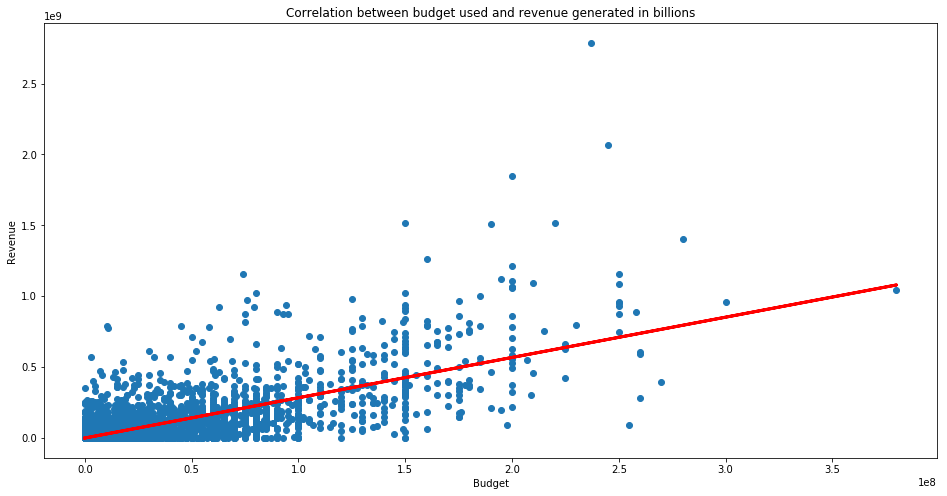

In [14]:
line_x = X_train
line_y = budget_N_revenue_train.intercept_ + budget_N_revenue_train.coef_ * X_train

f, ax = plt.subplots(1, 1, figsize = (16, 8))
plt.scatter(X_train, y_train)
plt.plot(line_x, line_y, 'r-', linewidth = 3)

plt.title('Correlation between budget used and revenue generated in billions')
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()


In [15]:
predicted = regr.predict(X_test)
print("R^2 score:", r2_score(y_test, predicted))

R^2 score: 0.6093134151921709


In [16]:
corr_compare = improve_metadata_df[['budget', 'revenue']]
corr_compare.corr()

,budget,revenue
budget,1.000000,0.768717
revenue,0.768717,1.000000


The R^2 values shows strength of the relationship between an independent and dependent variable, which in this case is budget and revenue respectively. Since the R^2 score for these 2 variables are not very strong, it shows that the amount of budget spent on the movie does not play a significant role in generating higher box office revenues.

2 Variables now, Budget and Runtime

In [17]:
budget_and_runtime_var = improve_metadata_df[['budget', 'runtime']]

X2_train, X2_test, y2_train, y2_test = train_test_split(budget_and_runtime_var, y, test_size = 0.2)

var2_N_revenue = regr.fit(X2_train, y2_train)
print(var2_N_revenue)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)


In [18]:
print(var2_N_revenue.coef_)
print(var2_N_revenue.intercept_)

[[  2.85722477 -99.21260969]]
[-889369.89729401]


In [19]:
predicted2 = regr.predict(X2_test)
print("R^2 score:", r2_score(y2_test, predicted2))

R^2 score: 0.5773894237649364


#### WordCloud of Important Actors in the Dataset

In [20]:
df_castlist = improve_metadata_df['cast_list']
cast_list = []

for i in df_castlist:
    for j in i:
        cast_list.append(j)

cast_list[:5]

['Tom Hanks', 'Tim Allen', 'Don Rickles', 'Jim Varney', 'Wallace Shawn']

Remove the spacing in the names

In [21]:
improved_cast_list = []

for a in cast_list:
    amend = remove_space(a)
    improved_cast_list.append(amend)
    
improved_cast_list[:5]

['TomHanks', 'TimAllen', 'DonRickles', 'JimVarney', 'WallaceShawn']

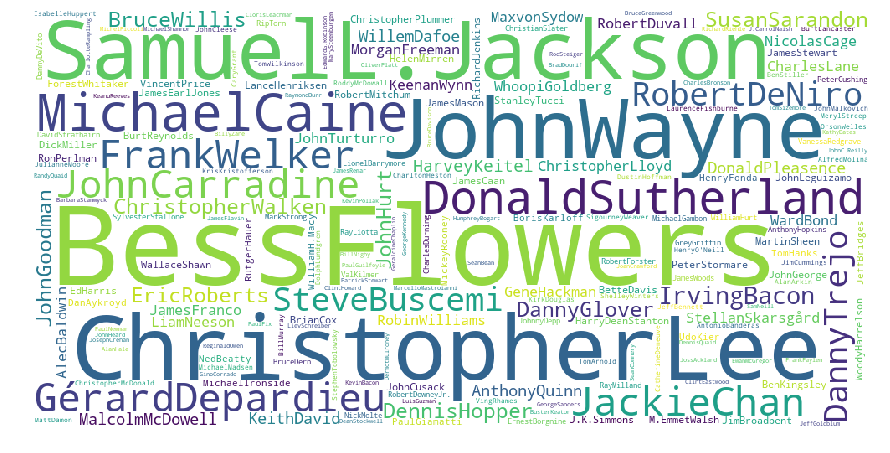

In [22]:
word_could_dict = Counter(improved_cast_list)
wordcloud = WordCloud(width = 1000, height = 500, background_color = 'white').generate_from_frequencies(word_could_dict)

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis("off")
# plt.savefig('word_cloud.png', bbox_inches='tight')
plt.show()

## Plotting

Here we are plotting the box office revenue of each movie with the top 20 highest box office.

In [23]:
len(improve_metadata_df) * 0.2

9023.800000000001

Text(0.5, 0, 'Original Titles')

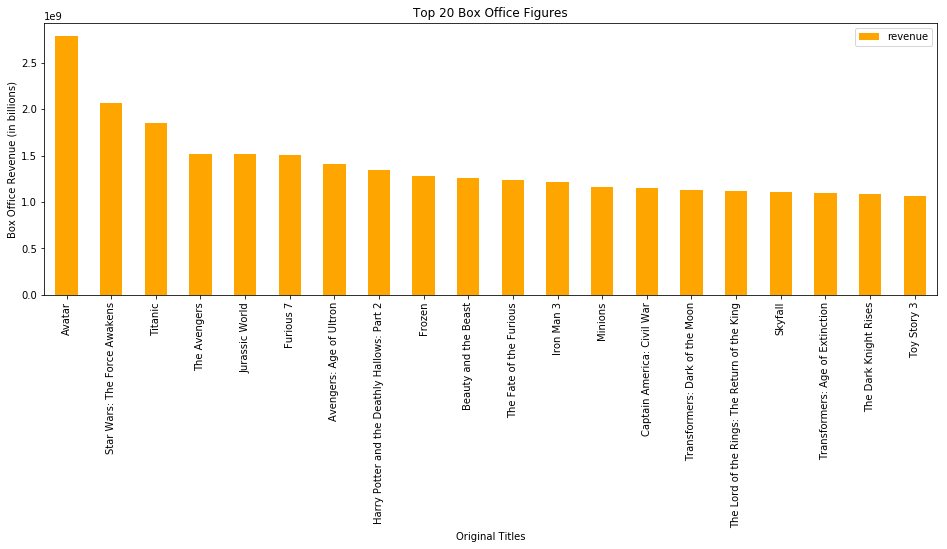

In [24]:
top_budget = improve_metadata_df.nlargest(9023, 'revenue')

top_budget_20 = improve_metadata_df.nlargest(20, 'revenue')
dims = (16, 5)
fig = plt.figure(figsize = dims)

ax2 = fig.add_subplot(111)

top_budget_20.plot(kind = 'bar', x = 'original_title', y = 'revenue', color = 'orange', ax = ax2)
plt.title("Top 20 Box Office Figures")
plt.ylabel("Box Office Revenue (in billions)")
# plt.xticks(rotation = 60)
ax2.set_xlabel('Original Titles')

In [25]:
top_budget.head()

,adult,budget,id,original_language,original_title,popularity,release_date,revenue,runtime,title,video,vote_average,vote_count,cast_list
14551,False,237000000,19995,en,Avatar,185.070892,2009-12-10,2.787965e+09,162.0,Avatar,False,7.2,12114.0,"[Sam Worthington, Zoe Saldana, Sigourney Weave..."
26555,False,245000000,140607,en,Star Wars: The Force Awakens,31.626013,2015-12-15,2.068224e+09,136.0,Star Wars: The Force Awakens,False,7.5,7993.0,"[Jeanette MacDonald, Allan Jones, Warren Willi..."
1639,False,200000000,597,en,Titanic,26.889070,1997-11-18,1.845034e+09,194.0,Titanic,False,7.5,7770.0,"[Kate Winslet, Leonardo DiCaprio, Frances Fish..."
17818,False,220000000,24428,en,The Avengers,89.887648,2012-04-25,1.519558e+09,143.0,The Avengers,False,7.4,12000.0,"[Robert Downey Jr., Chris Evans, Mark Ruffalo,..."
25084,False,150000000,135397,en,Jurassic World,32.790475,2015-06-09,1.513529e+09,124.0,Jurassic World,False,6.5,8842.0,[]


Identify the Important Casts in Top Grossing Films.

In [26]:
castlist_from_top = top_budget['cast_list']
top_casts = []

for i in castlist_from_top:
    for j in i:
        j = remove_space(j)
        top_casts.append(j)

top_casts[:5]

['SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'StephenLang',
 'MichelleRodriguez']

Word Cloud of Names of Important Artistes in Top Grossing Films

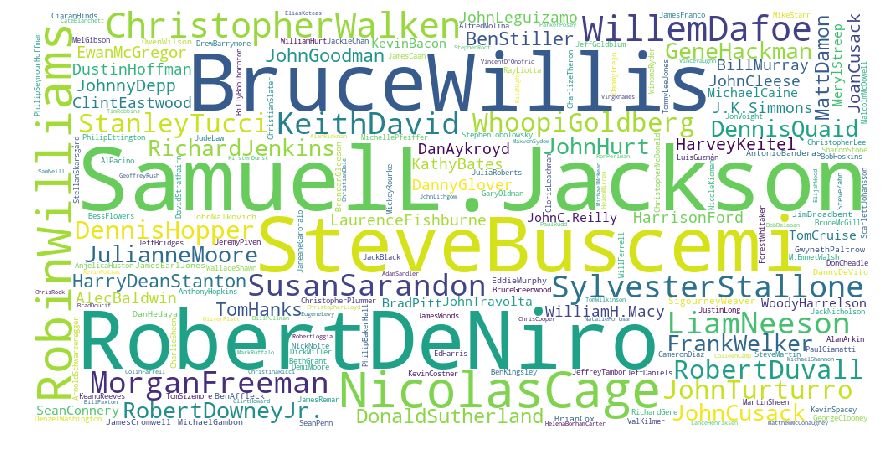

In [27]:
word_could_dict2 = Counter(top_casts)
wordcloud2 = WordCloud(width = 1000, height = 500, background_color = 'white').generate_from_frequencies(word_could_dict2)

plt.figure(figsize = (15,8))
plt.imshow(wordcloud2)
plt.axis("off")
# plt.savefig('word_cloud.png', bbox_inches='tight')
plt.show()

#### In Comparison

From the word cloud, we can see that cast can influence the revenue. However, revenue potential may have also influenced the cast decision to act in the movie. Cast like Samuel Jackson, Steve Buscemi and Bruce Willis are few of those who appeared most in movies with one of the highest revenue. However from another point of view, it can also be seen as the cast appearing on movies depending on the potential of the movie. For example, Bruce Willis has characters with large size in the bottom word cloud and not in the above clouds, which means that he only appear frequently in movies with large box office and not general movies. This could be due to large payouts which can be receive by acting in movies with potential of generating large revenue. Hence it is difficult to gauge whether the choice of cast influence the revenue generated from the movie. However, it is also possible that these cast are the ones who has improved revenue generated for the movie and hence the movies made it to the top of the revenue chart. If that is the case, then this data can provide companies on who to recruit for the movie.

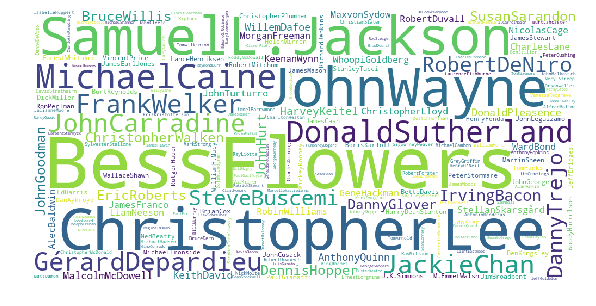

In [28]:
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

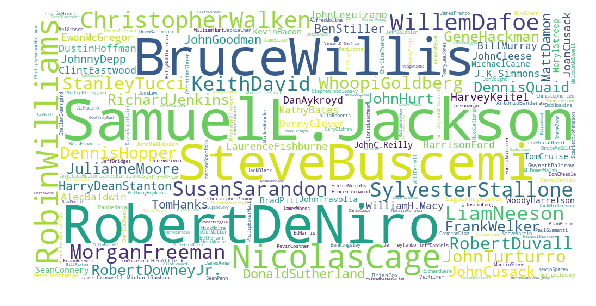

In [29]:
plt.figure(figsize = (10, 5))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

### Conclusion


In conclusion, from the data, it is difficult to use the factors mentioned in executive summary as a way to boost box office revenue. The relationship of budget and runtime of movie does not affect the box office revenue of the movie. In addition, over the history of movies, some celebrities are important as seen from the WordCloud.